# AeroFit Treadmill Customer Profiling & Descriptive Analytics

## Business Context

Aerofit is a leading brand in the field of fitness equipment. It provides treadmills and other fitness machines to different types of customers.

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company (KP281, KP481, KP781), so that they can provide better product recommendations to new customers.

**Key Business Questions**

1. What does a typical customer for each treadmill model (KP281, KP481, KP781) look like in terms of:
   - Age, Gender, Marital Status
   - Income, Education
   - Usage, Fitness level, Miles per week?

2. How are different customer characteristics related to the product purchased?  
   - Do age and income influence which treadmill is purchased?
   - Is there any pattern by gender or marital status?

3. What are the **marginal and conditional probabilities** for:
   - Purchasing each product overall
   - Purchasing each product given gender, marital status, and other factors?

4. What practical **business recommendations** can we make for:
   - Targeting and positioning each treadmill
   - Pricing and promotion
   - Sales and cross-sell strategies

We will use descriptive analytics, contingency tables, probability calculations, and visualizations to build customer profiles for each AeroFit treadmill product.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Understanding the Data

In this section we will:
- Check the shape of the dataset
- Inspect data types of all attributes
- Look at basic statistics for numerical features
- Convert categorical attributes to `category` type

In [3]:
df.shape

(180, 9)

In [6]:
df.columns.to_list()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [70]:
# Convert suitable columns to category type
cat_cols = ["Product", "Gender", "MaritalStatus"]
for col in cat_cols:
    df[col] = df[col].astype("category")

df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
AgeGroup         category
dtype: object

In [71]:
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Product:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      104
Female     76
Name: count, dtype: int64

Value counts for MaritalStatus:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


## Data Quality: Missing Values & Outliers

We will:
- Check for missing values in each column
- Detect outliers using boxplots and basic statistics
- Compare mean vs median to see skewness (possible outliers)

In [17]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
num_cols = ["Age", "Education", "Usage", "Income", "Fitness", "Miles"]

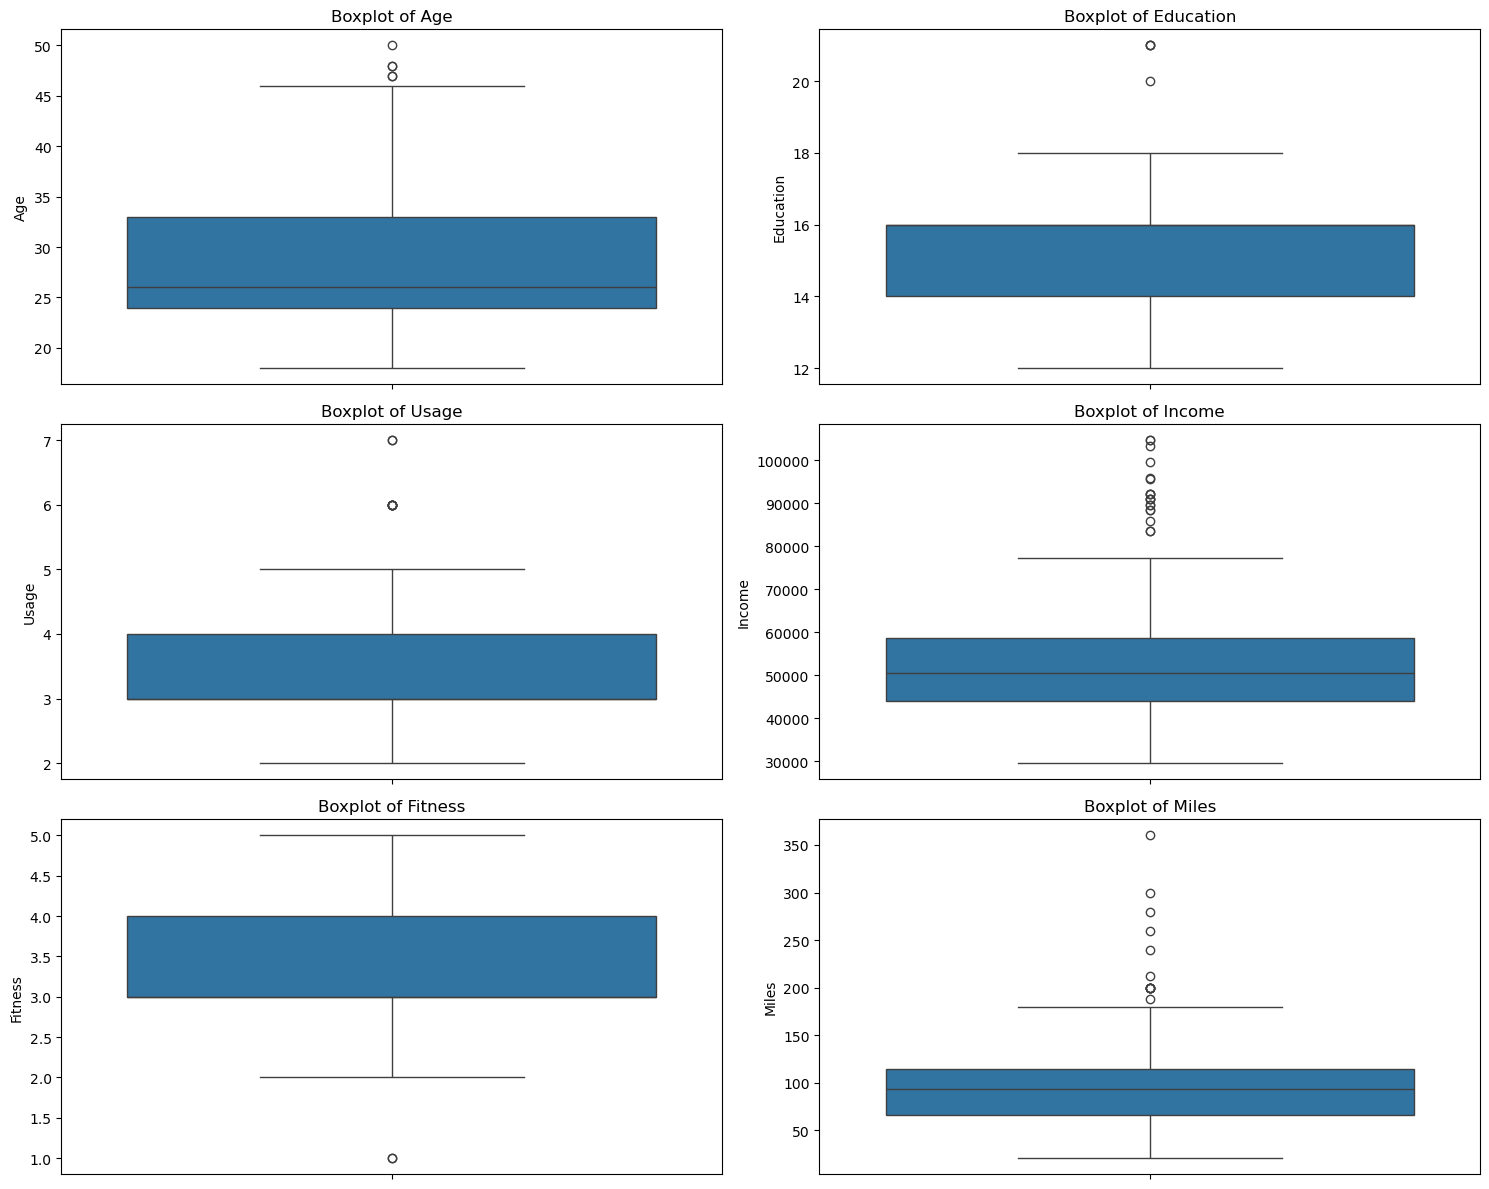

In [22]:
# Boxplots for all numeric variables to visually inspect outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Observations on Outliers

- **Age**: Roughly between 24-34, with median around 26, and a few outliers above 46 years.
- **Income**: Typically more skewed, have a few high-income outliers.
- **Miles**: Roughly between 65-120, with median around 95, and a few outliers above 180 miles.

Outliers may represent genuinely high-value customers (e.g., high-income, high-usage customers), so we will **not** remove them blindly. We will keep them for now and interpret insights accordingly.

## Non-Graphical Analysis

Here we look at:
- Frequency distribution of product purchased
- Distribution of gender and marital status
- Basic idea of how customers are spread across fitness levels and usage

In [74]:
# Product distribution
df["Product"].value_counts(normalize=True).round(3) * 100  # as percentages

Product
KP281    44.4
KP481    33.3
KP781    22.2
Name: proportion, dtype: float64

In [24]:
# Gender distribution
df["Gender"].value_counts(normalize=True).round(3) * 100

Gender
Male      57.8
Female    42.2
Name: proportion, dtype: float64

In [25]:
# Marital Status distribution
df["MaritalStatus"].value_counts(normalize=True).round(3) * 100

MaritalStatus
Partnered    59.4
Single       40.6
Name: proportion, dtype: float64

In [26]:
# Fitness distribution
df["Fitness"].value_counts().sort_index()

Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

### Key Non-Graphical Observations

- **Product mix**: KP281 is the most commonly purchased (44.4% share)
- **Gender split**: majority male (but still fairly balanced).
- **Marital status**: more partnered customers (around 60%)
- **Fitness levels**: most customers rate themselves as 3 out of 5.

These high-level distributions provide a first view of AeroFit’s existing customer base.

## Univariate Visual Analysis

We now explore each variable individually using histograms and countplots.

We will:
- Plot histograms for continuous variables (Age, Usage, Income, Miles, etc.)
- Plot countplots for categorical variables (Product, Gender, MaritalStatus)

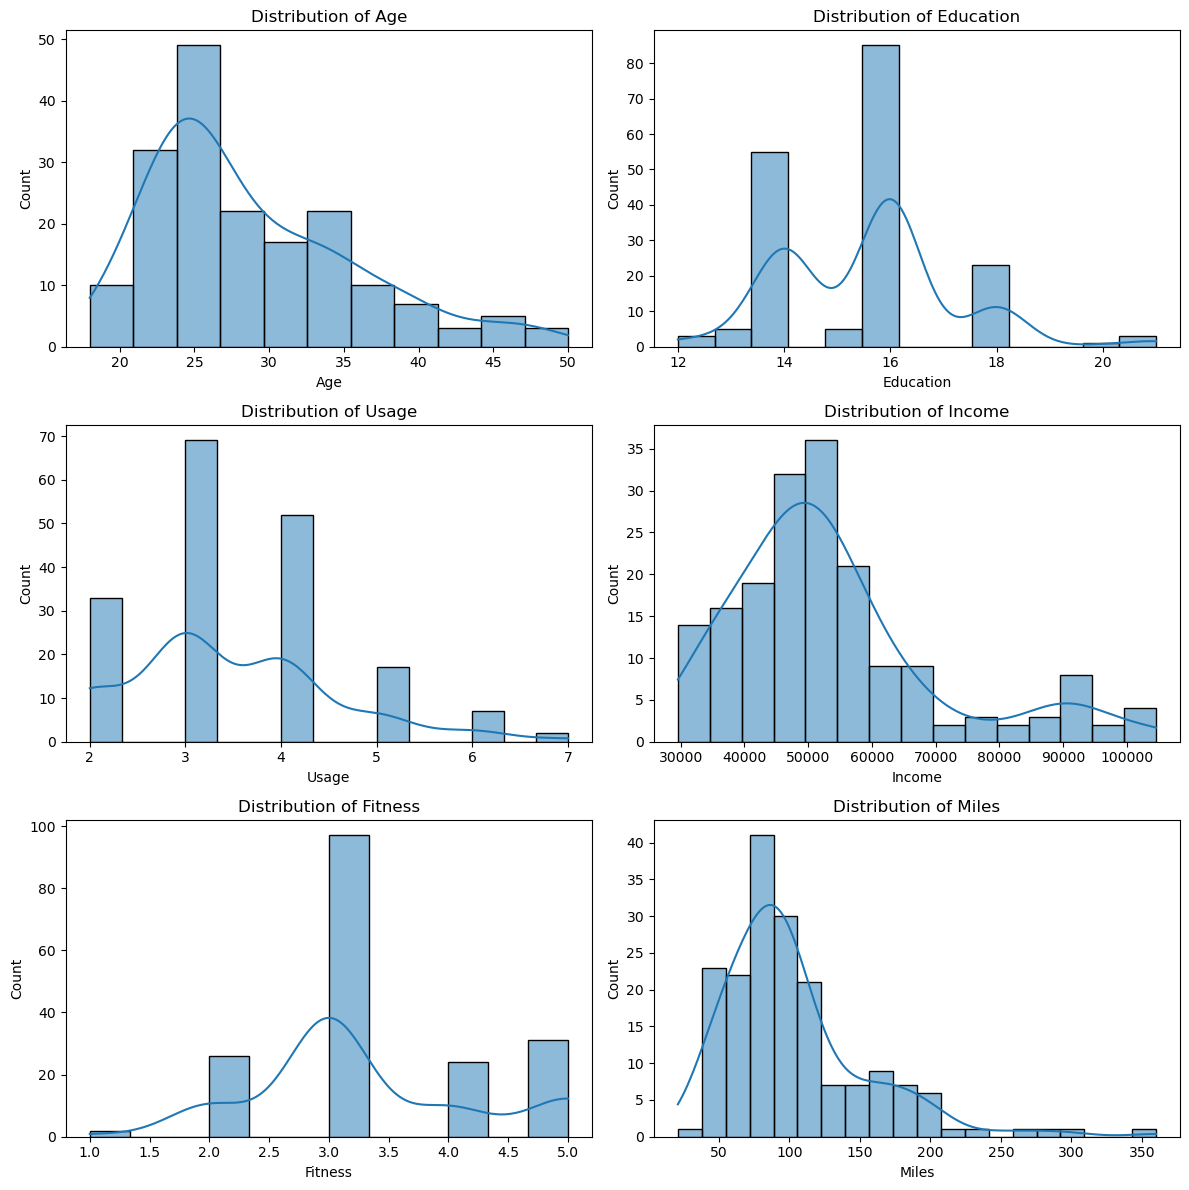

In [35]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

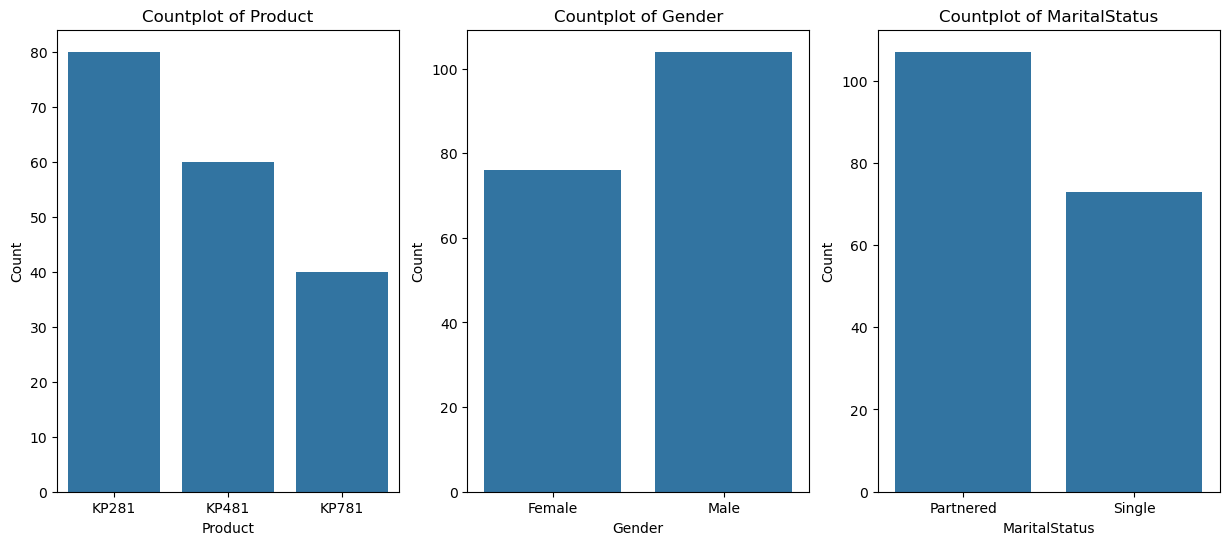

In [44]:
cat_cols = ["Product", "Gender", "MaritalStatus"]

plt.figure(figsize=(15, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.show()

### Univariate Insights

- **Age**: Roughly concentrated in 20–35 age range, skewed towards right.
- **Income**: Highly concentrated in 35-60K range, highly skewed towards right.
- **Usage**: Typical planned usage per week, 2–4 times.
- **Miles**: Typical expected miles per week, 40-120 miles.
- **Product**: KP281 is the most popular model.
- **Gender / Marital Status**: Slightly Imbalanced.

These insights help us understand who the current customers are before we relate them to products.

## Bivariate Analysis & Customer Profiling

We now study how different customer characteristics relate to the **Product Purchased**.

We will create:
- Boxplots of continuous variables by Product
- Countplots of Product split by Gender and Marital Status
- Categorized age groups to make interpretation easier

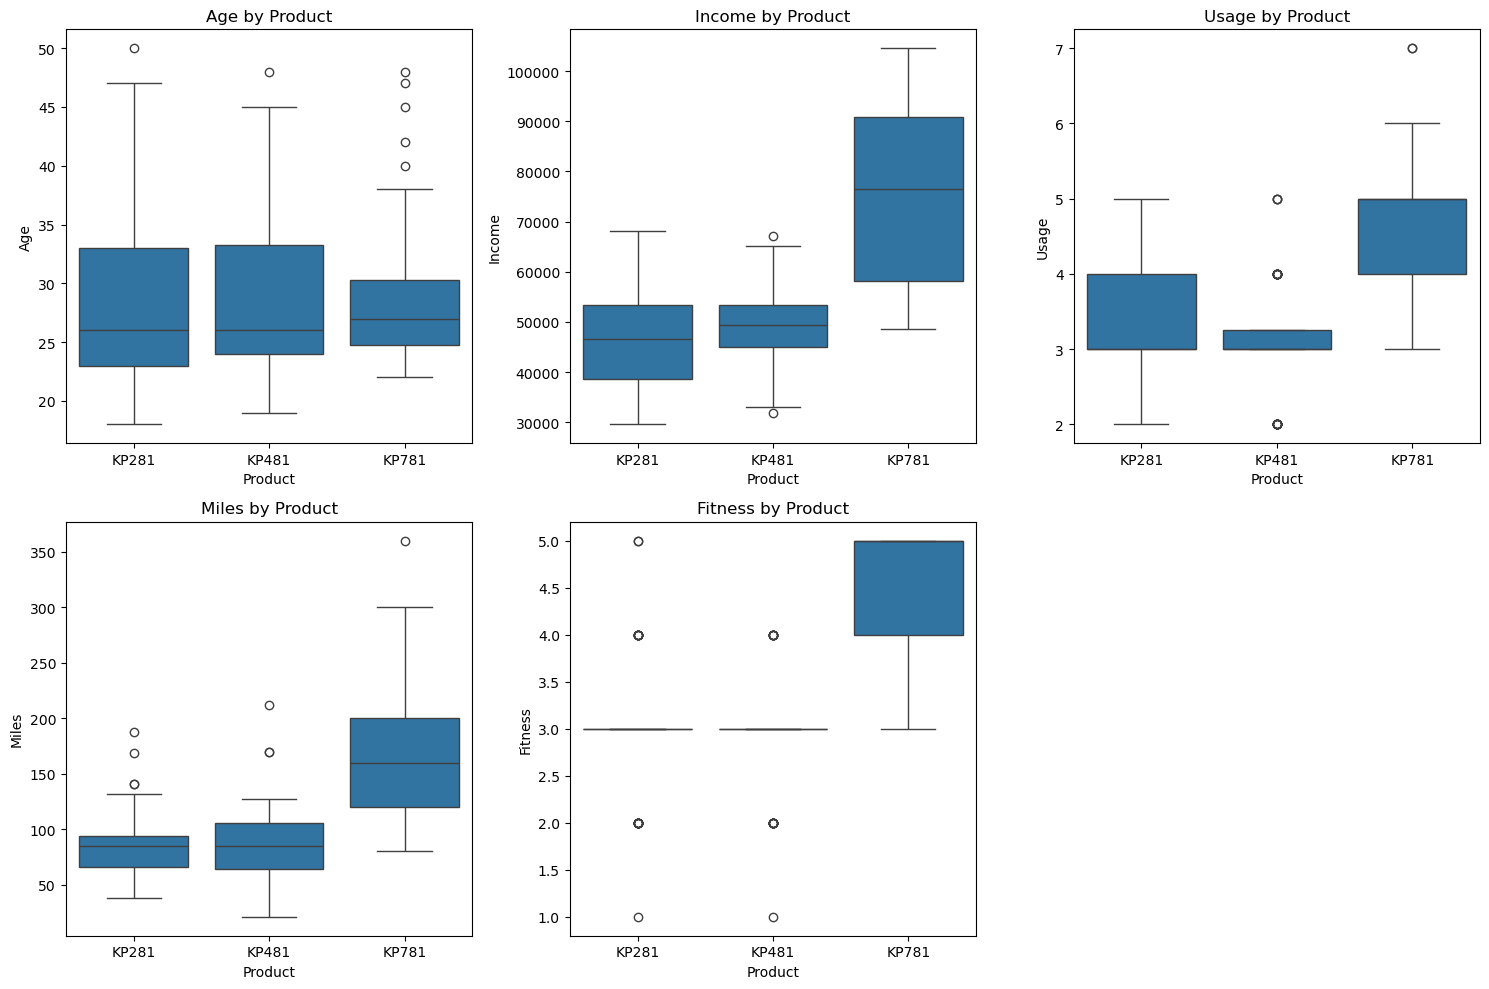

In [40]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(["Age", "Income", "Usage", "Miles", "Fitness"], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Product", y=col, data=df)
    plt.title(f"{col} by Product")
plt.tight_layout()
plt.show()

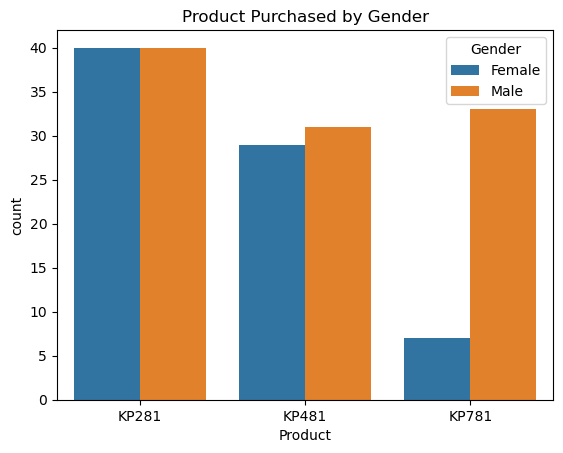

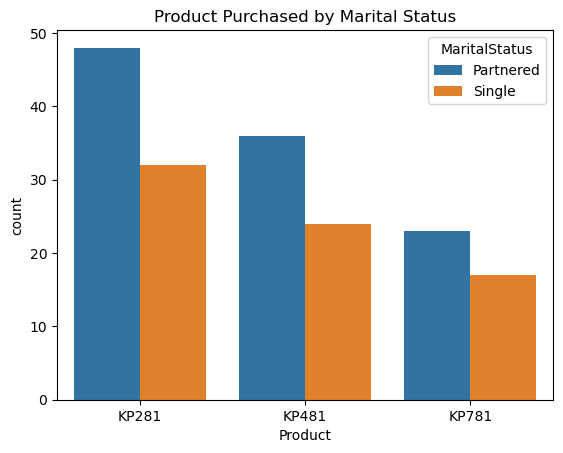

In [48]:
plt.figure()
sns.countplot(x="Product", hue="Gender", data=df)
plt.title("Product Purchased by Gender")
plt.show()

plt.figure()
sns.countplot(x="Product", hue="MaritalStatus", data=df)
plt.title("Product Purchased by Marital Status")
plt.show()

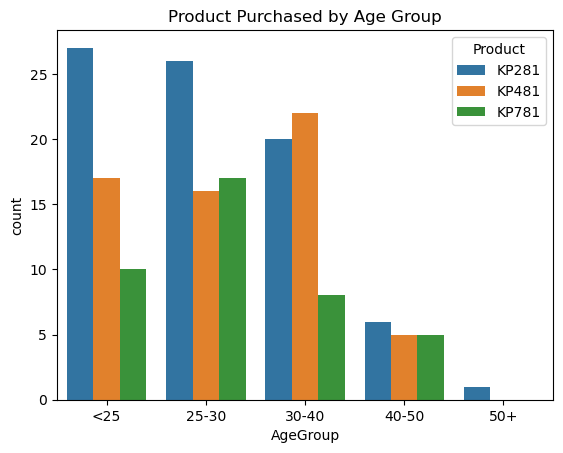

In [51]:
# Age groups 
age_bins = [0, 25, 30, 40, 50, 100]
age_labels = ["<25", "25-30", "30-40", "40-50", "50+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

plt.figure()
sns.countplot(x="AgeGroup", hue="Product", data=df)
plt.title("Product Purchased by Age Group")
plt.show()

### Bivariate Insights (Product vs Customer Characteristics)

- **Product vs Age**:
  - KP281: Larger age range compared to others.
  - KP781: highly fit / higher-income / more serious users.

- **Product vs Income**:
  - Entry-level KP281 might attract customers with lower income.
  - Advanced KP781 is likely favored by higher-income customers because of higher price.

- **Product vs Usage / Miles / Fitness**:
  - Customers who plan to use the treadmill more frequently and run more miles may prefer the KP781 (advanced features).
  - Lower-usage customers may opt for KP281.

- **Product vs Gender**:
  - KP781 is more popular among males.

- **Product vs Marital Status**:
  - Partnered customers tend to buy more, possibly for family usage.

These patterns directly inform how we position each product and whom we should target in marketing campaigns.

## Probability Analysis: Marginal & Conditional

We will compute:
- **Marginal probabilities** of each product
- **Two-way contingency tables** between Product and each categorical variable
- **Conditional probabilities**, such as:
  - P(Product = KP781 | Gender = Male)
  - P(Product = KP281 | AgeGroup = 25–35)

In [52]:
product_counts = df["Product"].value_counts()
product_prob = df["Product"].value_counts(normalize=True)

marginal_table = pd.DataFrame({
    "Count": product_counts,
    "Probability": (product_prob * 100).round(2)
})
marginal_table

,Count,Probability
Product,,
KP281,80,44.44
KP481,60,33.33
KP781,40,22.22


The table above shows the **marginal probability** of a customer purchasing each product.  
For example, if KP281 has 44.44%, KP481 has 33.33%, and KP781 has 22.22% share, these percentages give the base rates before conditioning on any other variable.

In [55]:
ct_gender = pd.crosstab(df["Gender"], df["Product"], margins=True)
ct_gender

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [58]:
# Conditional probability of Product given Gender
cond_product_given_gender = pd.crosstab(df["Gender"], df["Product"], normalize='index').round(3)
cond_product_given_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.526,0.382,0.092
Male,0.385,0.298,0.317


In [59]:
# Probability of KP781 given Gender = Male
p_kp781_given_male = cond_product_given_gender.loc["Male", "KP781"]
p_kp781_given_male
print(f"P(Product = KP781 | Gender = Male) = {p_kp781_given_male:.3f} ({p_kp781_given_male*100:.2f}%)")

P(Product = KP781 | Gender = Male) = 0.317 (31.70%)


In [60]:
ct_marital = pd.crosstab(df["MaritalStatus"], df["Product"], margins=True)
ct_marital

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [61]:
cond_product_given_marital = pd.crosstab(df["MaritalStatus"], df["Product"], normalize="index").round(3)
cond_product_given_marital

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.449,0.336,0.215
Single,0.438,0.329,0.233


In [62]:
ct_agegroup = pd.crosstab(df["AgeGroup"], df["Product"], margins=True)
ct_agegroup

Product,KP281,KP481,KP781,All
AgeGroup,,,,
<25,27,17,10,54
25-30,26,16,17,59
30-40,20,22,8,50
40-50,6,5,5,16
50+,1,0,0,1
All,80,60,40,180


In [63]:
cond_product_given_agegroup = pd.crosstab(df["AgeGroup"], df["Product"], normalize="index").round(3)
cond_product_given_agegroup

Product,KP281,KP481,KP781
AgeGroup,,,
<25,0.500,0.315,0.185
25-30,0.441,0.271,0.288
30-40,0.400,0.440,0.160
40-50,0.375,0.312,0.312
50+,1.000,0.000,0.000


### Probability Insights

- **Marginal probabilities (overall product share)**:
  - KP281: ~44.44%
  - KP481: ~33.33%
  - KP781: ~22.22%

- **Conditional probabilities by Gender**:
  - P(KP781 | Male): ~31.7%
  - P(KP781 | Female): ~9.2%
  - Since P(KP781 | Male) >> P(KP781 | Female), advanced model is relatively more popular among male customers.

- **Conditional probabilities by Marital Status**:
  - P(models | Partnered) vs P(models | Single) tells us couples/families have no significant buying differences than singles for a given model.

- **Conditional probabilities by AgeGroup**:
  - Younger age groups show higher probability for entry-level models.
  - Older, higher-income age groups might show higher probability for KP781.

These probabilities are very useful for predicting which product is more likely to be bought by a particular customer segment.

## Correlation Analysis

We now check correlations between numerical variables such as:
- Age, Education, Income, Usage, Miles, Fitness

This helps us understand how different behavioral and demographic factors move together.

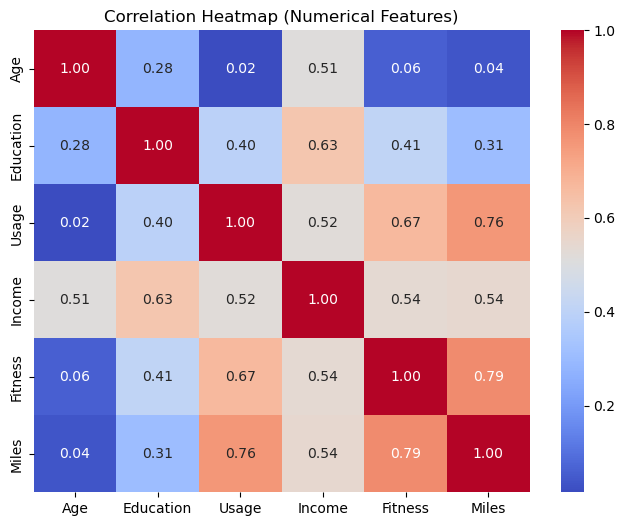

In [66]:
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

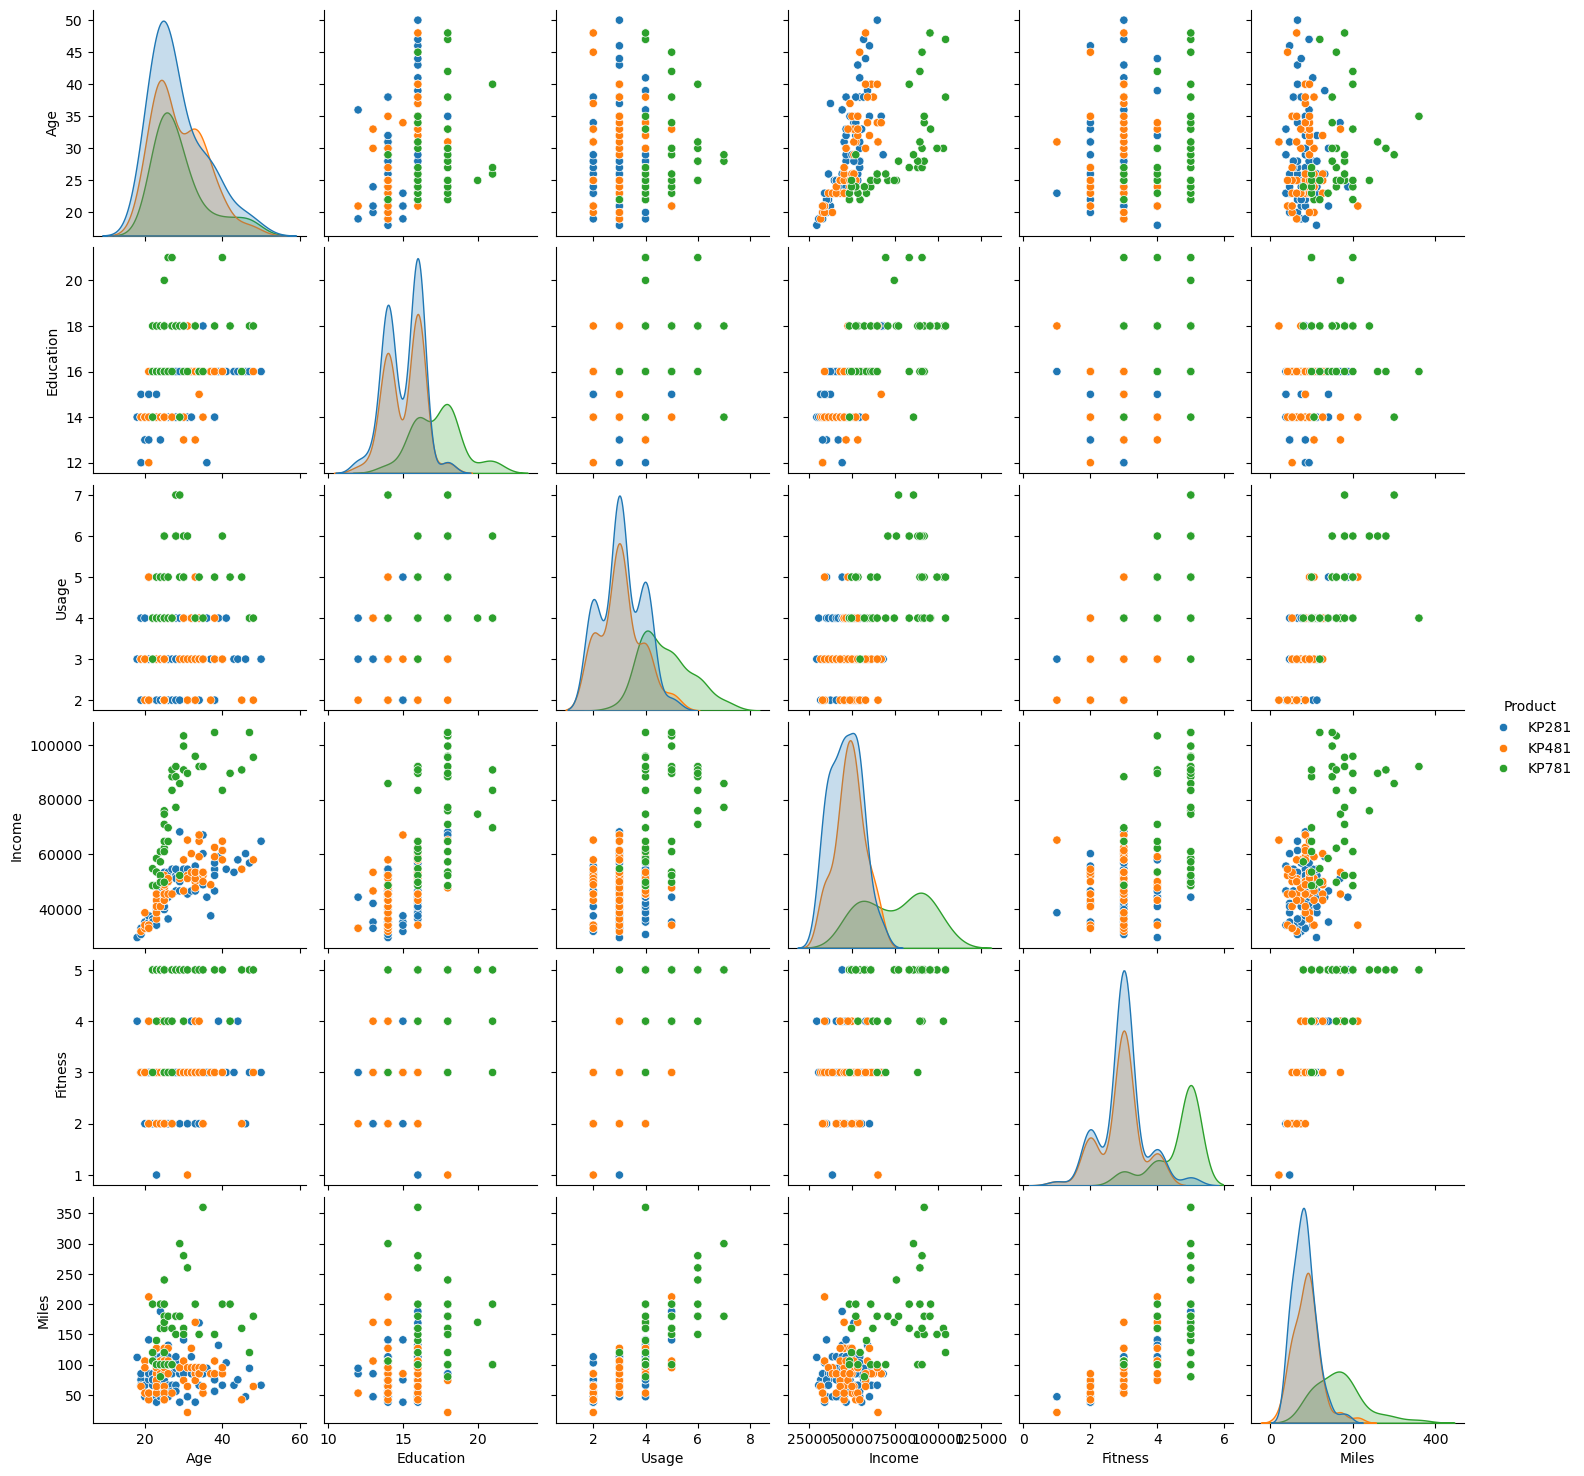

In [67]:
sns.pairplot(df, vars=num_cols, hue="Product")
plt.show()

### Correlation Insights

- **Usage** and **Miles** are positively correlated (people who use treadmill more also run more miles).
- **Income** and **Miles/Usage**:
  - Higher-income customers are also slightly more fitness-conscious.
- **Age** with **Usage**:
  - Younger customers show slightly higher usage.

These relationships help us refine our understanding of different customer segments beyond single variables.

## Customer Profiles by Product

### KP281: Entry-Level Treadmill (Price: $1,500)

- **Demographics**:
  - Age: younger adults, mainly 24–33
  - Income: lower to mid income range
  - Gender: similar buying pattern for both males and females

- **Behavior & Fitness**:
  - Usage: 3-4 times per week
  - Miles: low to moderate weekly miles(~65-95 miles)
  - Fitness: self-rated around 3 out of 5

- **Typical Customer Story**:
  > A budget-conscious beginner who wants to start working out at home, with moderate commitment and no need for advanced features.

---

### KP481: Mid-Level Treadmill (Price: $1,750)

- **Demographics**:
  - Age: mid-range age
  - Income: middle-income professionals
  - Marital Status: more partnered customers 

- **Behavior & Fitness**:
  - Usage: around 3 times per week
  - Miles: low to moderate weekly miles(~60-110 miles)
  - Fitness: self-rated 3 out of 5

- **Typical Customer Story**:
  > A working professional or couple who exercises moderately and is willing to pay a bit more for better features and durability.

---

### KP781: Advanced Treadmill (Price: $2,500)

- **Demographics**:
  - Age: typically around 25-30
  - Income: higher income group (~60-90K)
  - Gender / Marital Status: More popular amoung male customers

- **Behavior & Fitness**:
  - Usage: 4–5+ times per week
  - Miles: higher weekly miles (125-200 miles)
  - Fitness: self-rated 4–5, serious fitness enthusiasts

- **Typical Customer Story**:
  > A high-income, fitness-focused user who trains frequently, values advanced features, and is willing to invest more for performance and longevity.

## Key Business Insights (Non-Technical)

1. **Three Clear Customer Segments**
   - **KP281 (Entry-level)**: Attracts more budget-conscious and beginner users with lower usage and miles per week.
   - **KP481 (Mid-level)**: Appeals to regular users with stable income who want a balance of price and features.
   - **KP781 (Advanced)**: Chosen more by higher-income and more serious fitness users who exercise more often and run more miles.

2. **Income and Product Choice are Linked**
   - Customers with higher income are more likely to buy the **KP781**.
   - Lower and middle-income customers are more likely to choose **KP281** or **KP481**.

3. **Usage and Miles Explain Product Preference**
   - Customers who plan to use the treadmill more often and run more miles are more likely to buy **KP781**.
   - Less frequent users tend to buy the **KP281**, which is cheaper and sufficient for light usage.

4. **Differences by Gender and Marital Status**
   - There are visible differences in how men and women, and single vs partnered customers, choose products.
   - For example, if partnered customers buy more **KP481/KP781**, it suggests these treadmills are seen as a family investment.

5. **Probabilities Help Target the Right Customers**
   - We can estimate probabilities like:
     - “If a customer is male and high-income, the chance they buy KP781 is higher.”
     - “If a customer is young with lower income, the chance they buy KP281 is higher.”
   - These probabilities help the sales team suggest the right model quickly.

6. **Fitness Level Matters**
   - Customers who rate their fitness level higher are more likely to choose **advanced models**.
   - Customers with lower fitness levels lean toward the entry-level treadmill.

Overall, there is a clear relationship between **who the customer is** (age, income, marital status, fitness level) and **which treadmill they choose**.

## Recommendations for AeroFit

1. **Target KP281 to Beginners and Budget Buyers**
   - Focus marketing on young professionals and first-time buyers.
   - Highlight “affordable, reliable, perfect for starting your fitness journey.”
   - Offer easy EMI / installment plans to attract low-to-mid income customers.

2. **Position KP481 as the “Best Value” Option**
   - Promote it as the ideal choice for regular users who want good features without paying a premium.
   - Bundle with accessories (mats, basic fitness plan) to increase perceived value.
   - Target partnered customers and families who want a durable home treadmill.

3. **Promote KP781 to High-Income, Serious Fitness Users**
   - Highlight advanced features: better cushioning, higher speed, incline, training programs, connectivity, etc.
   - Partner with fitness influencers, gyms, and coaches who recommend high-performance equipment.
   - Offer premium after-sales service and extended warranty.

4. **Use Customer Profile in Sales Conversations**
   - Train sales staff to quickly ask a few questions:
     - “How many times a week will you use it?”
     - “How many miles do you plan to run per week?”
     - “What is your fitness goal?”
   - Based on answers, guide customers to KP281, KP481, or KP781 using the probability patterns found.

5. **Design Targeted Campaigns**
   - Online ads for KP281 aimed at young, low-to-mid income segments.
   - Personalized emails promoting KP781 to existing high-income or frequent-use customers.
   - Special “family packages” and discounts on KP481 and KP781 for married/partnered customers.

6. **Monitor and Refine Profiles Over Time**
   - As more data comes in, regularly update customer profiles and probabilities.
   - Use this updated data to further tune marketing messages and sales pitches.

These simple actions can help AeroFit improve sales conversion, increase customer satisfaction, and better match each customer with the right treadmill.